# Prerpocessing data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('cancer_classification.csv')

In [3]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


Checking difference between benign and malignant 

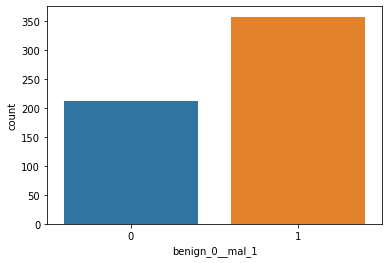

In [4]:
sns.countplot(x='benign_0__mal_1', data=df)
plt.show()

Checking correlation between features

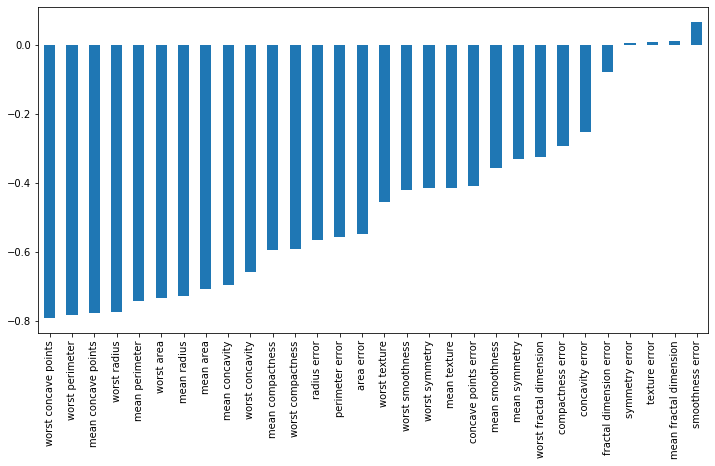

In [5]:
plt.figure(figsize=(12,6))
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')
plt.show()

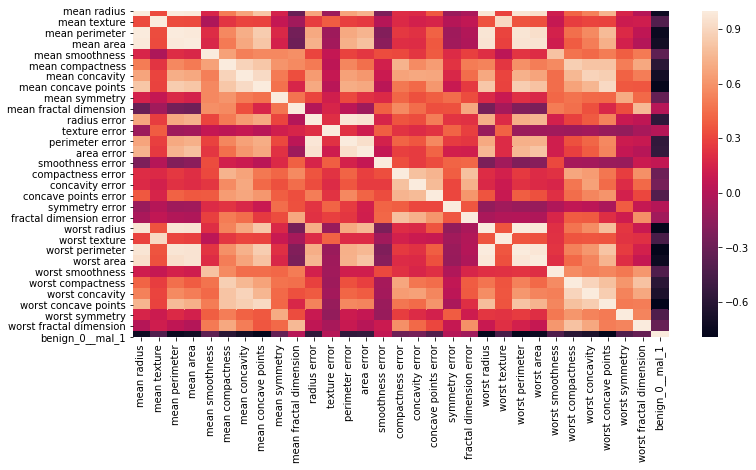

In [6]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr())
plt.show()

Creating train test split X and y features

In [7]:
X = df.drop('benign_0__mal_1', axis=1).values
y = df['benign_0__mal_1'].values

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [10]:
from sklearn.preprocessing import MinMaxScaler

In [11]:
scaler = MinMaxScaler()

In [12]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Creating the model

In [13]:
from tensorflow.keras.models import Sequential

In [14]:
from tensorflow.keras.layers import Dense

In [15]:
X_train.shape

(426, 30)

In [16]:
model = Sequential()

model.add(Dense(30, activation='relu'))

model.add(Dense(15, activation='relu'))

# Activation function in the out put layer will be sigmoid, beacuse it's binary classification problem
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [17]:
# Choosing 600 for epochs, to overfit training data
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test, y_test))

Epoch 1/600
14/14 [==============================] - 0s 8ms/step - loss: 0.6767 - val_loss: 0.6619
Epoch 2/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6485 - val_loss: 0.6311
Epoch 3/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6158 - val_loss: 0.5946
Epoch 4/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5800 - val_loss: 0.5573
Epoch 5/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5427 - val_loss: 0.5198
Epoch 6/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5055 - val_loss: 0.4776
Epoch 7/600
14/14 [==============================] - 0s 2ms/step - loss: 0.4639 - val_loss: 0.4349
Epoch 8/600
14/14 [==============================] - 0s 2ms/step - loss: 0.4215 - val_loss: 0.3902
Epoch 9/600
14/14 [==============================] - 0s 2ms/step - loss: 0.3843 - val_loss: 0.3496
Epoch 10/600
14/14 [==============================] - 0s 2ms/step - loss: 0.3504 - val_loss: 0.3144
Epoch 11/

14/14 [==============================] - 0s 2ms/step - loss: 0.0489 - val_loss: 0.1123
Epoch 84/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0480 - val_loss: 0.1160
Epoch 85/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0476 - val_loss: 0.1120
Epoch 86/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0496 - val_loss: 0.1173
Epoch 87/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0501 - val_loss: 0.1136
Epoch 88/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0470 - val_loss: 0.1227
Epoch 89/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0472 - val_loss: 0.1125
Epoch 90/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0506 - val_loss: 0.1223
Epoch 91/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0449 - val_loss: 0.1113
Epoch 92/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0499 - val_loss: 0.1231
Epoch 93/600


Epoch 164/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0332 - val_loss: 0.1552
Epoch 165/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0335 - val_loss: 0.1454
Epoch 166/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0334 - val_loss: 0.1536
Epoch 167/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0323 - val_loss: 0.1496
Epoch 168/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0323 - val_loss: 0.1474
Epoch 169/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0337 - val_loss: 0.1481
Epoch 170/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0320 - val_loss: 0.1449
Epoch 171/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0367 - val_loss: 0.1603
Epoch 172/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0348 - val_loss: 0.1455
Epoch 173/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0383 - val_los

14/14 [==============================] - 0s 2ms/step - loss: 0.0220 - val_loss: 0.1858
Epoch 246/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0223 - val_loss: 0.1929
Epoch 247/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0218 - val_loss: 0.1875
Epoch 248/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0225 - val_loss: 0.1789
Epoch 249/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0214 - val_loss: 0.1839
Epoch 250/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0218 - val_loss: 0.1716
Epoch 251/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0284 - val_loss: 0.2005
Epoch 252/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0237 - val_loss: 0.1893
Epoch 253/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0213 - val_loss: 0.1800
Epoch 254/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0213 - val_loss: 0.1828
Epoc

14/14 [==============================] - 0s 2ms/step - loss: 0.0141 - val_loss: 0.2211
Epoch 327/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0132 - val_loss: 0.2012
Epoch 328/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0125 - val_loss: 0.2234
Epoch 329/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0136 - val_loss: 0.2148
Epoch 330/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0136 - val_loss: 0.2095
Epoch 331/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0131 - val_loss: 0.2083
Epoch 332/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0166 - val_loss: 0.2557
Epoch 333/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0153 - val_loss: 0.2053
Epoch 334/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0148 - val_loss: 0.2075
Epoch 335/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0138 - val_loss: 0.2112
Epoc

14/14 [==============================] - 0s 2ms/step - loss: 0.0090 - val_loss: 0.2522
Epoch 408/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0082 - val_loss: 0.2403
Epoch 409/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0071 - val_loss: 0.2570
Epoch 410/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0074 - val_loss: 0.2432
Epoch 411/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0086 - val_loss: 0.2629
Epoch 412/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0113 - val_loss: 0.2309
Epoch 413/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0124 - val_loss: 0.2341
Epoch 414/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0073 - val_loss: 0.2434
Epoch 415/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0070 - val_loss: 0.2560
Epoch 416/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0070 - val_loss: 0.2464
Epoc

14/14 [==============================] - 0s 2ms/step - loss: 0.0042 - val_loss: 0.2678
Epoch 489/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0041 - val_loss: 0.2882
Epoch 490/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0043 - val_loss: 0.2638
Epoch 491/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0044 - val_loss: 0.2852
Epoch 492/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0041 - val_loss: 0.2718
Epoch 493/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0040 - val_loss: 0.2809
Epoch 494/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0040 - val_loss: 0.2772
Epoch 495/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0049 - val_loss: 0.2632
Epoch 496/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0054 - val_loss: 0.2905
Epoch 497/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0041 - val_loss: 0.2678
Epoc

14/14 [==============================] - 0s 2ms/step - loss: 0.0024 - val_loss: 0.3198
Epoch 570/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0025 - val_loss: 0.3145
Epoch 571/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0024 - val_loss: 0.3076
Epoch 572/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0024 - val_loss: 0.3093
Epoch 573/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0022 - val_loss: 0.3097
Epoch 574/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0024 - val_loss: 0.3168
Epoch 575/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0025 - val_loss: 0.3079
Epoch 576/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0023 - val_loss: 0.3079
Epoch 577/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0022 - val_loss: 0.3221
Epoch 578/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0023 - val_loss: 0.3078
Epoc

In [19]:
losses = pd.DataFrame(model.history.history)

The key characteristic of overfitting is that train loss going down, however validation loss is beginning to increase.

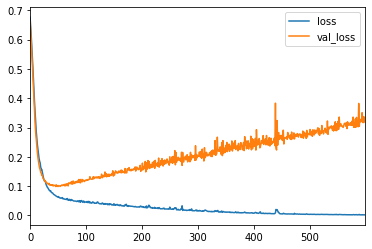

In [22]:
losses.plot()
plt.show()

## Overfitting Prevention

### Using early stopping

Recreating the fresh model with the same parameters

In [24]:
model = Sequential()

model.add(Dense(30, activation='relu'))

model.add(Dense(15, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

Using the callbacks

In [26]:
from tensorflow.keras.callbacks import EarlyStopping

In [27]:
help(EarlyStopping)

Help on class EarlyStopping in module tensorflow.python.keras.callbacks:

class EarlyStopping(Callback)
 |  EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto', baseline=None, restore_best_weights=False)
 |  
 |  Stop training when a monitored metric has stopped improving.
 |  
 |  Assuming the goal of a training is to minimize the loss. With this, the
 |  metric to be monitored would be 'loss', and mode would be 'min'. A
 |  `model.fit()` training loop will check at end of every epoch whether
 |  the loss is no longer decreasing, considering the `min_delta` and
 |  `patience` if applicable. Once it's found no longer decreasing,
 |  `model.stop_training` is marked True and the training terminates.
 |  
 |  The quantity to be monitored needs to be available in `logs` dict.
 |  To make it so, pass the loss or metrics at `model.compile()`.
 |  
 |  Example:
 |  
 |  >>> callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
 |  >>> # This cal

In [28]:
early_stop = EarlyStopping(monitor='val_loss', mode=min, verbose=1, patience=25)

In [29]:
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test, y_test),
         callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 0s 5ms/step - loss: 0.7273 - val_loss: 0.7093
Epoch 2/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6800 - val_loss: 0.6676
Epoch 3/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6437 - val_loss: 0.6333
Epoch 4/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6080 - val_loss: 0.5959
Epoch 5/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5694 - val_loss: 0.5551
Epoch 6/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5294 - val_loss: 0.5146
Epoch 7/600
14/14 [==============================] - 0s 2ms/step - loss: 0.4895 - val_loss: 0.4730
Epoch 8/600
14/14 [==============================] - 0s 2ms/step - loss: 0.4495 - val_loss: 0.4301
Epoch 9/600
14/14 [==============================] - 0s 2ms/step - loss: 0.4095 - val_loss: 0.3846
Epoch 10/600
14/14 [==============================] - 0s 2ms/step - loss: 0.3714 - val_loss: 0.3494
Epoch 11/

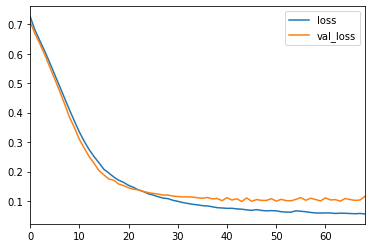

In [30]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()
plt.show()

### Using dropout layers

Recreating the fresh model with the same parameters

In [32]:
from tensorflow.keras.layers import Dropout

Recreating the fresh model with the same parameters

In [34]:
model = Sequential()

model.add(Dense(30, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(15, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [35]:
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test, y_test),
         callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 0s 5ms/step - loss: 0.7088 - val_loss: 0.6809
Epoch 2/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6879 - val_loss: 0.6716
Epoch 3/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6674 - val_loss: 0.6623
Epoch 4/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6688 - val_loss: 0.6519
Epoch 5/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6552 - val_loss: 0.6368
Epoch 6/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6432 - val_loss: 0.6236
Epoch 7/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6279 - val_loss: 0.6033
Epoch 8/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6214 - val_loss: 0.5806
Epoch 9/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6019 - val_loss: 0.5625
Epoch 10/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5753 - val_loss: 0.5413
Epoch 11/

14/14 [==============================] - 0s 3ms/step - loss: 0.1520 - val_loss: 0.1112
Epoch 84/600
14/14 [==============================] - 0s 2ms/step - loss: 0.1512 - val_loss: 0.0970
Epoch 85/600
14/14 [==============================] - 0s 2ms/step - loss: 0.1288 - val_loss: 0.0962
Epoch 86/600
14/14 [==============================] - 0s 2ms/step - loss: 0.1287 - val_loss: 0.0937
Epoch 87/600
14/14 [==============================] - 0s 2ms/step - loss: 0.1185 - val_loss: 0.1272
Epoch 88/600
14/14 [==============================] - 0s 2ms/step - loss: 0.1231 - val_loss: 0.1029
Epoch 89/600
14/14 [==============================] - 0s 2ms/step - loss: 0.1299 - val_loss: 0.1058
Epoch 90/600
14/14 [==============================] - 0s 2ms/step - loss: 0.1174 - val_loss: 0.0991
Epoch 91/600
14/14 [==============================] - 0s 2ms/step - loss: 0.1107 - val_loss: 0.0912
Epoch 92/600
14/14 [==============================] - 0s 2ms/step - loss: 0.1328 - val_loss: 0.1058
Epoch 93/600


In [36]:
model_loss = pd.DataFrame(model.history.history)

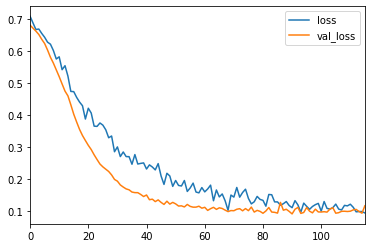

In [37]:
model_loss.plot()
plt.show()

## Evaluation

In [39]:
predictions = model.predict_classes(X_test)

In [40]:
from sklearn.metrics import classification_report, confusion_matrix

In [41]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95        55
           1       0.99      0.94      0.97        88

    accuracy                           0.96       143
   macro avg       0.95      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143



In [42]:
print(confusion_matrix(y_test, predictions))

[[54  1]
 [ 5 83]]
